# Pre-MS Stars in the Small Magellanic Cloud

Models are currently computed with a metallicity of [$m$/H] $= -0.5$, which is higher than observed. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as scint 

## Equipartition Magnetic Field Strengths

Surface magnetic field strengths are approximated by assuming the magnetic field is in thermal equipartition with the ambient plasma at an optical depth $\tau_{\rm ross} = 1$. Thermal equipartition implies that
\begin{equation}
    B_{{\rm eq},\, \tau=1} = \left(8\pi P_{\rm gas}\right)^{1/2}.
\end{equation}
Gas pressures for the ambient stellar plasma are estimated using detailed stellar model atmospheres. Combinations of $\log g$ and $T_{\rm eff}$ necessary to determine the surface gas pressure are taken from a standard stellar evolution model isochrones at a given age. Since we're interested in a range of ages for comparison, we'll select multiple ages and compare values of equipartition magnetic field strengths. Provided equipartition values don't change appreciably, predictions from magnetic models computed with a single equipartition magnetic field strength will be robust.

We'll start by importing a series of standard model isochrones at 1, 5, 10, and 15 Myr.

In [2]:
iso_01 = np.genfromtxt('../../evolve/models/smc/std/dmestar_00001.0myr_z-0.50_a+0.00_phx.iso')
iso_05 = np.genfromtxt('../../evolve/models/smc/std/dmestar_00005.0myr_z-0.50_a+0.00_phx.iso')
iso_10 = np.genfromtxt('../../evolve/models/smc/std/dmestar_00010.0myr_z-0.50_a+0.00_phx.iso')
iso_15 = np.genfromtxt('../../evolve/models/smc/std/dmestar_00015.0myr_z-0.50_a+0.00_phx.iso')

Next, we'll load the atmospheric boundary condition table used to compute the isochrones. The tables are compiled using `PHOENIX` AMES-COND model atmospheres with a solar composition from Grevesse & Sauval (1998). While interior structure models rely on prescribing the gas pressure and temperature at $\tau_{\rm ross}=10$, we need to choose the table for $\tau_{\rm ross}=1$.

In [3]:
atm = np.genfromtxt('../../evolve/phoenix/ames-cond/tab/Zm0d5.ap0d0_t001.dat')

Atmosphere tables are structured so that $T_{\rm eff}$ values are listed in the first column, but $\log g$ is not tabulated; it must be prescribed.

In [4]:
teffs = atm[:,0]
loggs = np.arange(-0.5, 5.6, 0.5)

The rest of the table is structured as a set of values (P, T) at each $\log g$. It'll be easier to create new arrays for each of these.

In [5]:
temps = np.empty((len(teffs), len(loggs)))
press = np.empty((len(teffs), len(loggs)))
for i, teff in enumerate(atm[:, 1:]):
    for j, prop in enumerate(teff):
        if j%2 == 0:
            press[i, j/2] = prop
        else:
            temps[i, j/2] = prop

With the individual tables formed, we can construct an interpolation surface using a 2D interpolation routine. Note that we only really care about the pressure table, as that sets the equipartition magnetic field strengths. A linear interpolation will suffice for now, but there is structure to the temperature-pressure relation that requires a shape preserving interpolation algorithm.

In [6]:
pgas_surface = scint.interp2d(loggs, teffs, press, kind='linear')

We are now ready to compute equipartition magnetic field strengths along each of the isochrones. It'll be easiest to quickly define a generic function.

In [7]:
def computeBeq(iso):
    Beq = np.empty((len(iso)))
    for i in range(len(iso)):
        Beq[i] = np.sqrt(8.0*np.pi*pgas_surface(iso[i, 2], 10**iso[i, 1]))
    return Beq

And compute equipartition magnetic field strengths along each isochrone.

In [8]:
Beq_01 = computeBeq(iso_01)
Beq_05 = computeBeq(iso_05)
Beq_10 = computeBeq(iso_10)
Beq_15 = computeBeq(iso_15)

Now to compare how equipartition magnetic field strengths vary with age.

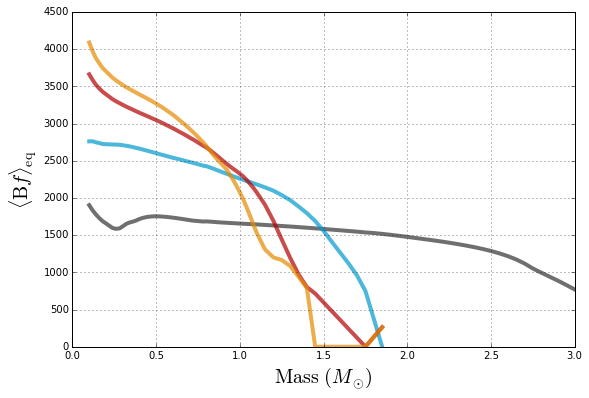

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(9., 6.))

ax.set_xlabel('${\\rm Mass}\ (M_{\\odot})$', fontsize=20)
ax.set_ylabel('$\\langle {\\rm B}f \\rangle_{\\rm eq}$', fontsize=20)
ax.grid()

ax.plot(iso_01[:,0], Beq_01, '-', lw=4, color='#333333', alpha=0.7)
ax.plot(iso_05[:,0], Beq_05, '-', lw=4, color='#0099cc', alpha=0.7)
ax.plot(iso_10[:,0], Beq_10, '-', lw=4, color='#b30000', alpha=0.7)
ax.plot(iso_15[:,0], Beq_15, '-', lw=4, color='#e68a00', alpha=0.7)

There is significant variation between 1 and 15 Myr at nearly every mass, with the exception of stars in the vicinity of $1 M_{\odot}$. However, if we choose a single set of equipartition magnetic fields (say at 10 Myr), we will know where the effects from magnetic fields will either be over and/or under-estimated. 

Let's take, for a start, equipartition magnetic field strengths at 10 Myr.